In [2]:
import uproot
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
from sklearn.metrics import auc
import os
import numpy as np
import pandas as pd 

import mplhep as hep
plt.style.use(hep.style.CMS)

In [3]:
!ls

calo_association.py
calo_association.pyc
calo_match_dataset.py
ExploreWithCoffea.ipynb
FourGammasGunPt1-100_pythia8_StdMixing_Flat55To75_14TeV_123X_mcRun3_2021_realistic_v11_UL18_pfRechitThres_egmRegNtuples_DeepSC_AlgoA_idealICs.root
FourGammasGunPt1-100_pythia8_StdMixing_Flat55To75_14TeV_123X_mcRun3_2021_realistic_v11_UL18_pfRechitThres_egmRegNtuples_Mustache_idealICs.root
__pycache__
reco_comparison.py
reco_comparison.py~
reco_comparison.pyc
Regression_comparison.ipynb
run_reco_comparison.py
run_reco_comparison.py~
windows_creator_dynamic_global_nooverlap.py
windows_creator_dynamic_global_overlap.py


### Reading the Egamma trees
Reading the files with all the branch and the final branches from the RealIC training

In [3]:
file_must_idealIC =  uproot.open("FourGammasGunPt1-100_pythia8_StdMixing_Flat55To75_14TeV_123X_mcRun3_2021_realistic_v11_UL18_pfRechitThres_SCRegression_Mustache/2021Run3_RealIC_IdealTraining_stdVar_stdCuts_ntrees1500_applied.root")
file_must_realIC =  uproot.open("FourGammasGunPt1-100_pythia8_StdMixing_Flat55To75_14TeV_123X_mcRun3_2021_realistic_v11_UL18_pfRechitThres_SCRegression_Mustache/2021Run3_RealIC_RealTraining_stdVar_stdCuts_ntrees1500_applied.root")
t_m_1 = file_must_idealIC["egRegTree"]
t_m_2 = file_must_realIC["egRegTreeFriend"]
df_m1 = t_m_1.arrays(["evt", "sc", "mc","ssFrac","sim","nrVert","nrPUInt"], library="pd")
df_m2 = t_m_2.arrays(library="pd")

In [5]:
file_deep_idealIC =  uproot.open("FourGammasGunPt1-100_pythia8_StdMixing_Flat55To75_14TeV_123X_mcRun3_2021_realistic_v11_UL18_pfRechitThres_SCRegression_DeepSC_AlgoA/2021Run3_RealIC_IdealTraining_stdVar_stdCuts_ntrees1500_applied.root")
file_deep_realIC =  uproot.open("FourGammasGunPt1-100_pythia8_StdMixing_Flat55To75_14TeV_123X_mcRun3_2021_realistic_v11_UL18_pfRechitThres_SCRegression_DeepSC_AlgoA/2021Run3_RealIC_RealTraining_stdVar_stdCuts_ntrees1500_applied.root")
t_d_1 = file_deep_idealIC["egRegTree"]
t_d_2 = file_deep_realIC["egRegTreeFriend"]
df_d1 = t_d_1.arrays(["evt", "sc", "mc","ssFrac","sim","nrVert","nrPUInt"], library="pd")
df_d2 = t_d_2.arrays(library="pd")

In [20]:
file_must_idealIC =  uproot.open("FourElectronsGunPt1-100_pythia8_StdMixing_Flat55To75_14TeV_123X_mcRun3_2021_realistic_v11_UL18_pfRechitThres_SCRegression_Mustache/2021Run3_RealIC_IdealTraining_stdVar_stdCuts_ntrees1500_applied.root")
file_must_realIC =  uproot.open("FourElectronsGunPt1-100_pythia8_StdMixing_Flat55To75_14TeV_123X_mcRun3_2021_realistic_v11_UL18_pfRechitThres_SCRegression_Mustache/2021Run3_RealIC_RealTraining_stdVar_stdCuts_ntrees1500_applied.root")
t_m_1 = file_must_idealIC["egRegTree"]
t_m_2 = file_must_realIC["egRegTreeFriend"]
df_m1 = t_m_1.arrays(["evt", "sc", "mc","ssFrac","sim","nrVert","nrPUInt"], library="pd")
df_m2 = t_m_2.arrays(library="pd")

In [19]:
file_deep_idealIC =  uproot.open("FourElectronsGunPt1-100_pythia8_StdMixing_Flat55To75_14TeV_123X_mcRun3_2021_realistic_v11_UL18_pfRechitThres_SCRegression_DeepSC_AlgoA/2021Run3_RealIC_IdealTraining_stdVar_stdCuts_ntrees1500_applied.root")
file_deep_realIC =  uproot.open("FourElectronsGunPt1-100_pythia8_StdMixing_Flat55To75_14TeV_123X_mcRun3_2021_realistic_v11_UL18_pfRechitThres_SCRegression_DeepSC_AlgoA/2021Run3_RealIC_RealTraining_stdVar_stdCuts_ntrees1500_applied.root")
t_d_1 = file_deep_idealIC["egRegTree"]
t_d_2 = file_deep_realIC["egRegTreeFriend"]
df_d1 = t_d_1.arrays(["evt", "sc", "mc","ssFrac","sim","nrVert","nrPUInt"], library="pd")
df_d2 = t_d_2.arrays(library="pd")

In [5]:
df_d1.columns

MultiIndex([(    'evt',                  'runnr'),
            (    'evt',                'lumiSec'),
            (    'evt',                'eventnr'),
            (     'sc',              'rawEnergy'),
            (     'sc',            'rawESEnergy'),
            (     'sc',               'etaWidth'),
            (     'sc',               'phiWidth'),
            (     'sc',         'seedClusEnergy'),
            (     'sc',       'numberOfClusters'),
            (     'sc',    'numberOfSubClusters'),
            (     'sc',           'clusterMaxDR'),
            (     'sc',       'clusterMaxDRDPhi'),
            (     'sc',       'clusterMaxDRDEta'),
            (     'sc',  'clusterMaxDRRawEnergy'),
            (     'sc',             'corrEnergy'),
            (     'sc',                  'scEta'),
            (     'sc',                  'scPhi'),
            (     'sc',                'seedEta'),
            (     'sc',                'seedPhi'),
            (     'sc',        

In [16]:
t_m_1.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
nrVert               | int32_t                  | AsDtype('>i4')
rho                  | float                    | AsDtype('>f4')
nrPUInt              | float                    | AsDtype('>f4')
nrPUIntTrue          | float                    | AsDtype('>f4')
evt                  | struct {int32_t runnr... | AsDtype("[('runnr', '>i4'),...
sc                   | struct {float rawEner... | AsDtype("[('rawEnergy', '>f...
ssFull               | struct {float e3x3; f... | AsDtype("[('e3x3', '>f4'), ...
ssFrac               | struct {float e3x3; f... | AsDtype("[('e3x3', '>f4'), ...
ele                  | struct {float et; flo... | AsDtype("[('et', '>f4'), ('...
pho                  | struct {float et; flo... | AsDtype("[('et', '>f4'), ('...
eleSSFull            | struct {float e3x3; f... | AsDtype("[('e3x3', '>f4'), ...
phoSSFull  

Applying some baseline cuts 

In [21]:
mask_d = (df_d1.mc.energy > 0) & (df_d1.ssFrac.sigmaIEtaIEta>0) & (df_d1.ssFrac.sigmaIPhiIPhi>0)
mask_m = (df_m1.mc.energy > 0) & (df_m1.ssFrac.sigmaIEtaIEta>0) & (df_m1.ssFrac.sigmaIPhiIPhi>0)
df_d1 = df_d1[mask_d]
df_d2 = df_d2[mask_d]
df_m1 = df_m1[mask_m]
df_m2 = df_m2[mask_m]

In [22]:
df_d1["corrFact"] = df_d2.invTar
df_m1["corrFact"] = df_m2.invTar

for df in [df_m1, df_d1]:
    df["et_seed"] = df.sc.seedClusEnergy /   np.cosh(df.sc.seedEta)
    df["en_raw"] = df.sc.rawEnergy + df.sc.rawESEnergy
    df["et_gen"] = df.mc.energy / np.cosh(df.sc.seedEta)
    df["et_sim"] = df.sim.energy / np.cosh(df.sc.seedEta)
    df["en_corr"] = df.en_raw* df.corrFact 
    df["et_corr"] = df.en_raw*df.corrFact/ np.cosh(df.sc.seedEta)
    df["Eraw_ovEtrue_sim"] =  df.en_raw / df.sim.energy
    df["Eraw_ovEtrue_gen"] = df.en_raw /df.mc.energy
    df["Ecorr_ovEtrue_gen"] = df.corrFact

In [11]:
def bin_analysis(col):
    def f(df):
        m = df[col].mean()
        A = (df[col].quantile(0.84) - df[col].quantile(0.16))/2
        B = (df[col].quantile(0.975) - df[col].quantile(0.025))/2
        return pd.Series({
            "m": m,
            "w68": A,
            "w95": B,
            "N": df[col].count()
        })
    return f

    
def get_sigma_eff(df):
    A = (df.quantile(0.84) - df.quantile(0.16)) /2
    B = (df.quantile(0.025) - df.quantile(0.975)) /2
    return A,B

    
def get_quantiles(df):
    return df.quantile(0.025), df.quantile(0.16), df.quantile(0.5), df.quantile(0.84), df.quantile(0.975)



# Plot ERaw/EGen

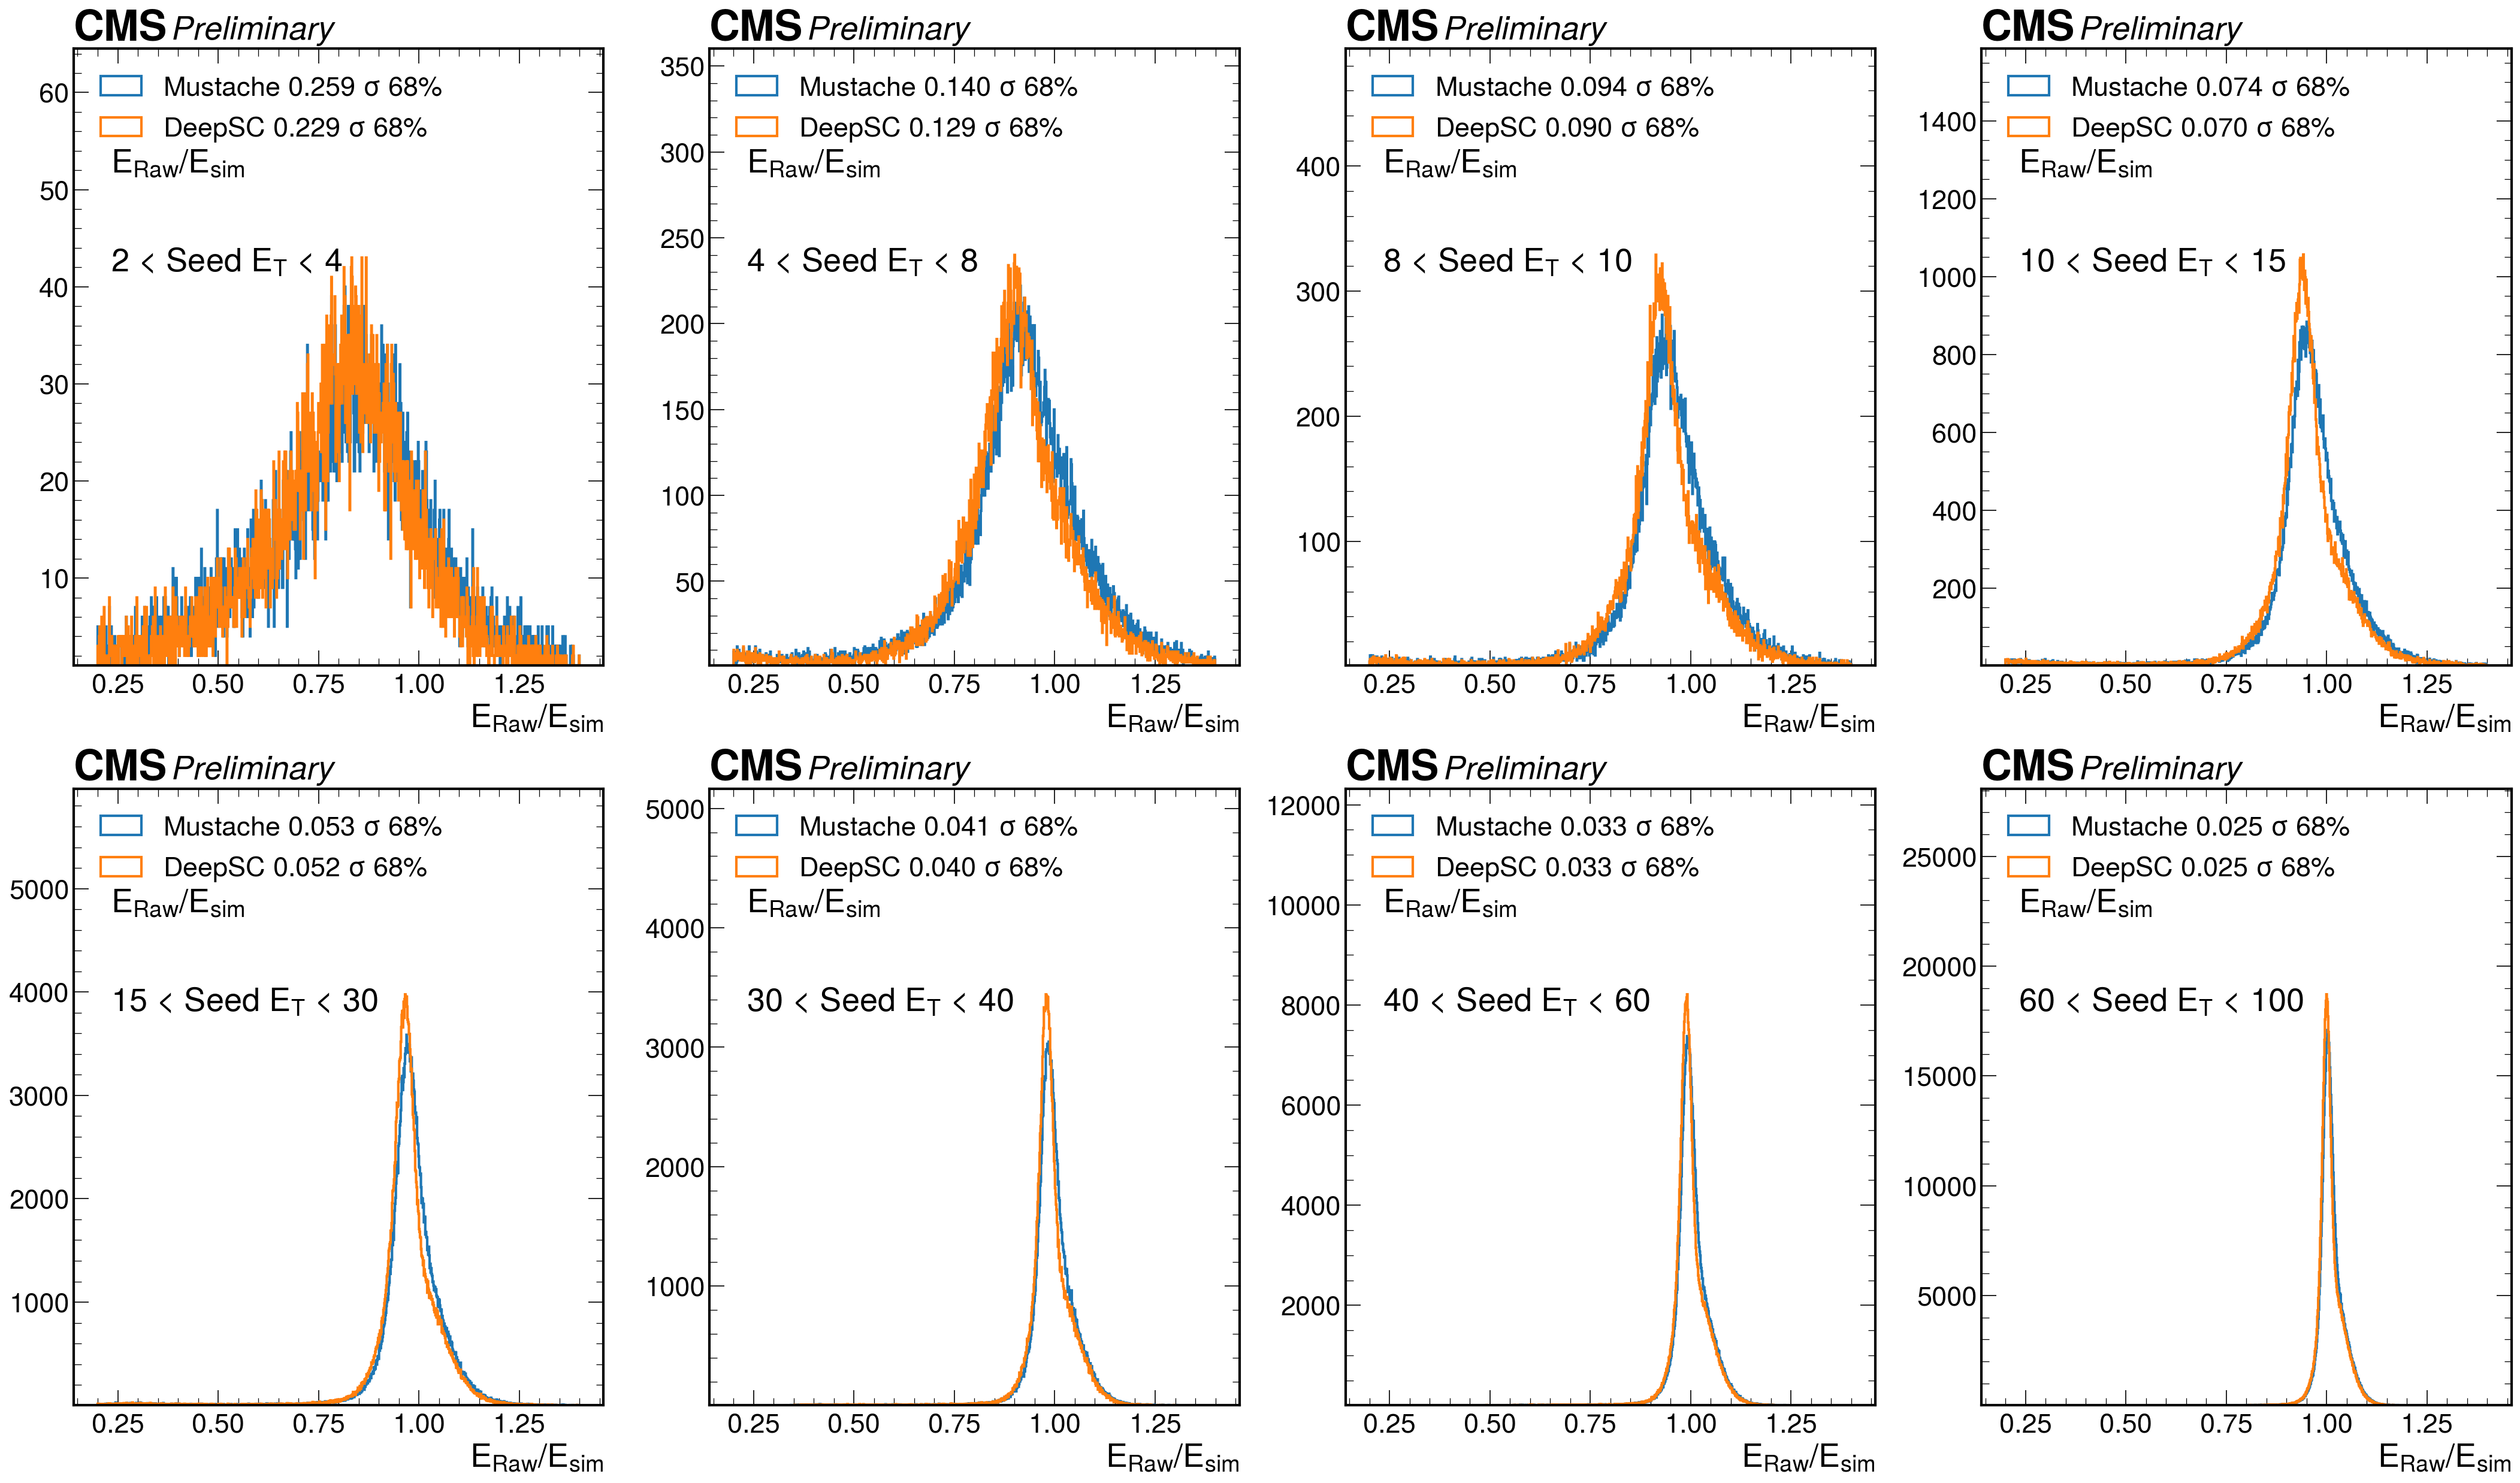

In [23]:
fig, ax = plt.subplots(2,4, figsize=(35,20),dpi=150)

xrange = (0.2, 1.4)
bins= 1000
flavour = "$E_{Raw}/E_{sim}$"
var = "Eraw_ovEtrue_sim"

r = [2, 4, 8, 10, 15, 30 ,40, 60,100]
s = [[], []]
for i in range(len(r)-1):
    line = i //4 
    s[line].append((r[i],r[i+1]))

for j,ss in enumerate(s): 
    for i, (e1,e2) in enumerate(ss): 
        dfx_must = df_must[(abs(df_must.et_seed)>=e1) & (abs(df_must.et_seed)<e2)]
        dfx_deep = df_deep[(abs(df_deep.et_seed)>=e1) & (abs(df_deep.et_seed)<e2)]


        width, width_2 = get_sigma_eff(dfx_deep[var])
        width_must, width_2_must = get_sigma_eff(dfx_must[var])

        ax[j,i].hist(dfx_must[var],bins=bins, range=xrange,histtype='step', linewidth=2, label='Mustache {:.3f} $\sigma$ 68%'.format(width_must))
        A= ax[j,i].hist(dfx_deep[var],bins=bins, range=xrange,histtype='step', linewidth=2, label='DeepSC {:.3f} $\sigma$ 68%'.format(width))
        maxY = np.max(A[0])
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_ylim(1, 1.5 * maxY)
        ax[j,i].set_xlabel(flavour)
        ax[j,i].text(0.07,0.64,  str(e1) + ' < Seed $E_T$ < ' + str(e2), transform = ax[j,i].transAxes)  
        ax[j,i].text(0.07, 0.8, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


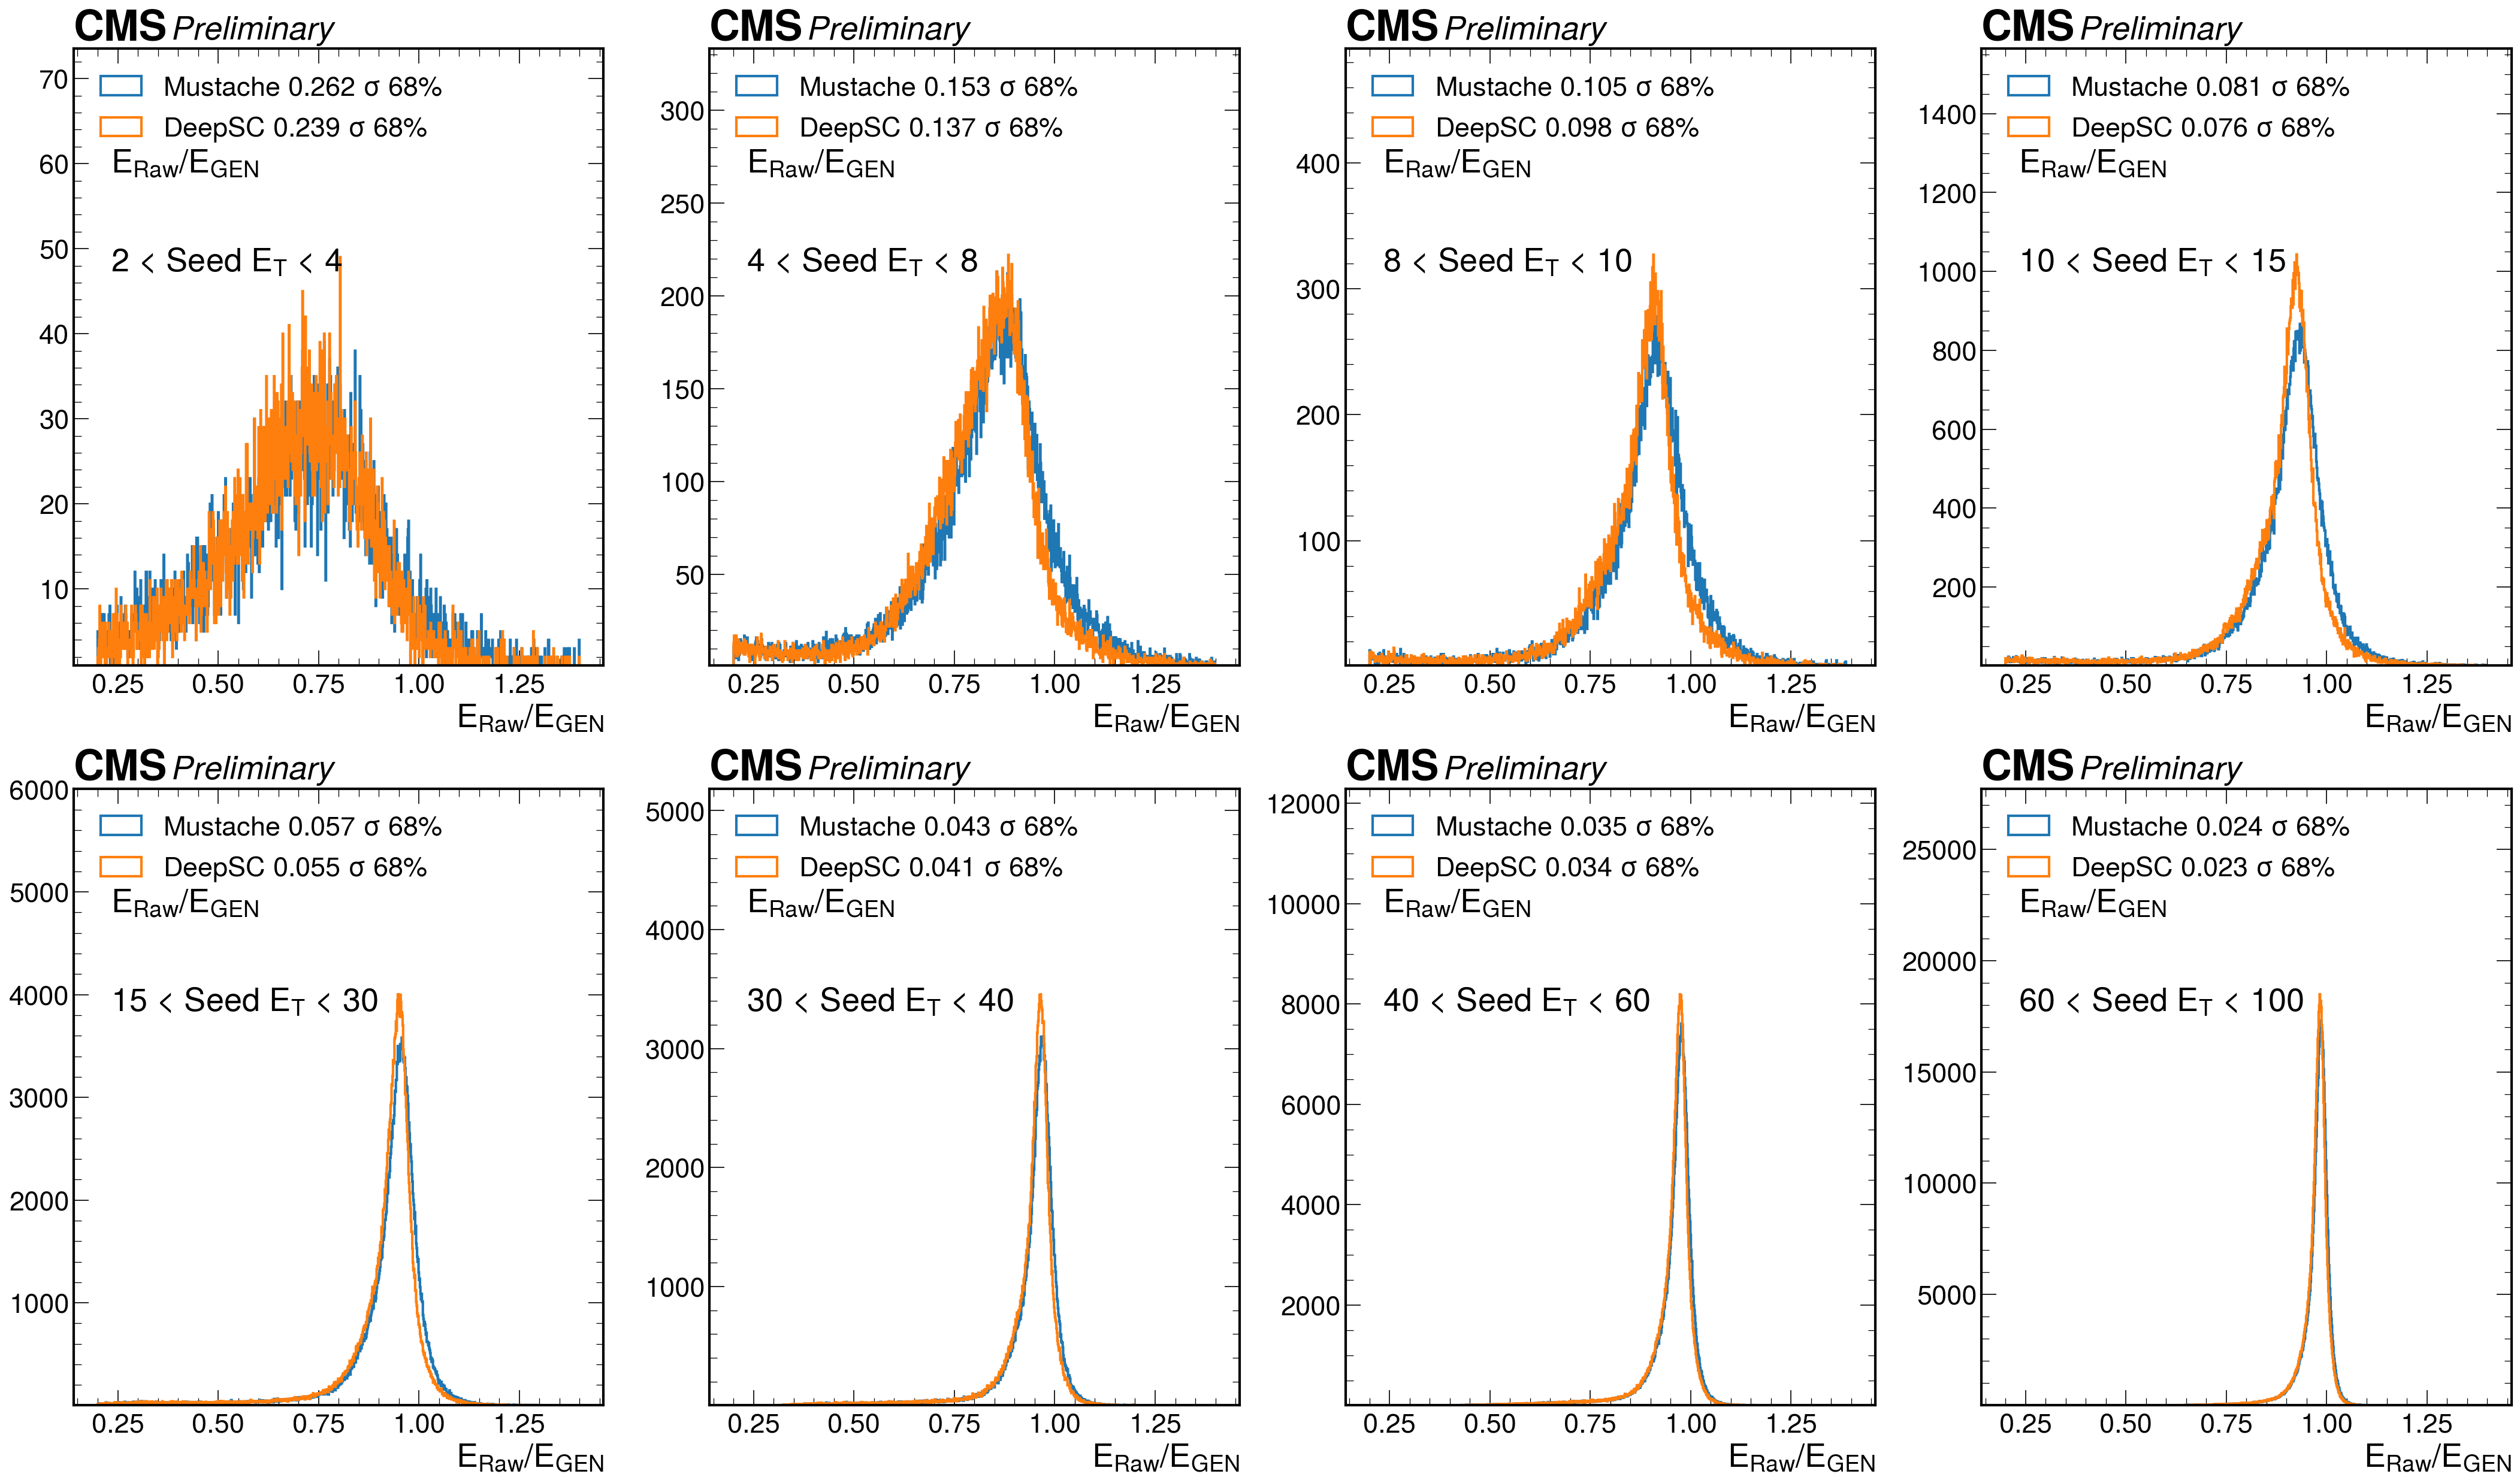

In [24]:
fig, ax = plt.subplots(2,4, figsize=(35,20),dpi=150)

xrange = (0.2, 1.4)
bins= 1000
flavour = "$E_{Raw}/E_{GEN}$"
var = "Eraw_ovEtrue_gen"

r = [2, 4, 8, 10, 15, 30 ,40, 60,100]
s = [[], []]
for i in range(len(r)-1):
    line = i //4 
    s[line].append((r[i],r[i+1]))

for j,ss in enumerate(s): 
    for i, (e1,e2) in enumerate(ss): 
        dfx_must = df_must[(abs(df_must.et_seed)>=e1) & (abs(df_must.et_seed)<e2)]
        dfx_deep = df_deep[(abs(df_deep.et_seed)>=e1) & (abs(df_deep.et_seed)<e2)]


        width, width_2 = get_sigma_eff(dfx_deep[var])
        width_must, width_2_must = get_sigma_eff(dfx_must[var])

        ax[j,i].hist(dfx_must[var],bins=bins, range=xrange,histtype='step', linewidth=2, label='Mustache {:.3f} $\sigma$ 68%'.format(width_must))
        A= ax[j,i].hist(dfx_deep[var],bins=bins, range=xrange,histtype='step', linewidth=2, label='DeepSC {:.3f} $\sigma$ 68%'.format(width))
        maxY = np.max(A[0])
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_ylim(1, 1.5 * maxY)
        ax[j,i].set_xlabel(flavour)
        ax[j,i].text(0.07,0.64,  str(e1) + ' < Seed $E_T$ < ' + str(e2), transform = ax[j,i].transAxes)  
        ax[j,i].text(0.07, 0.8, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


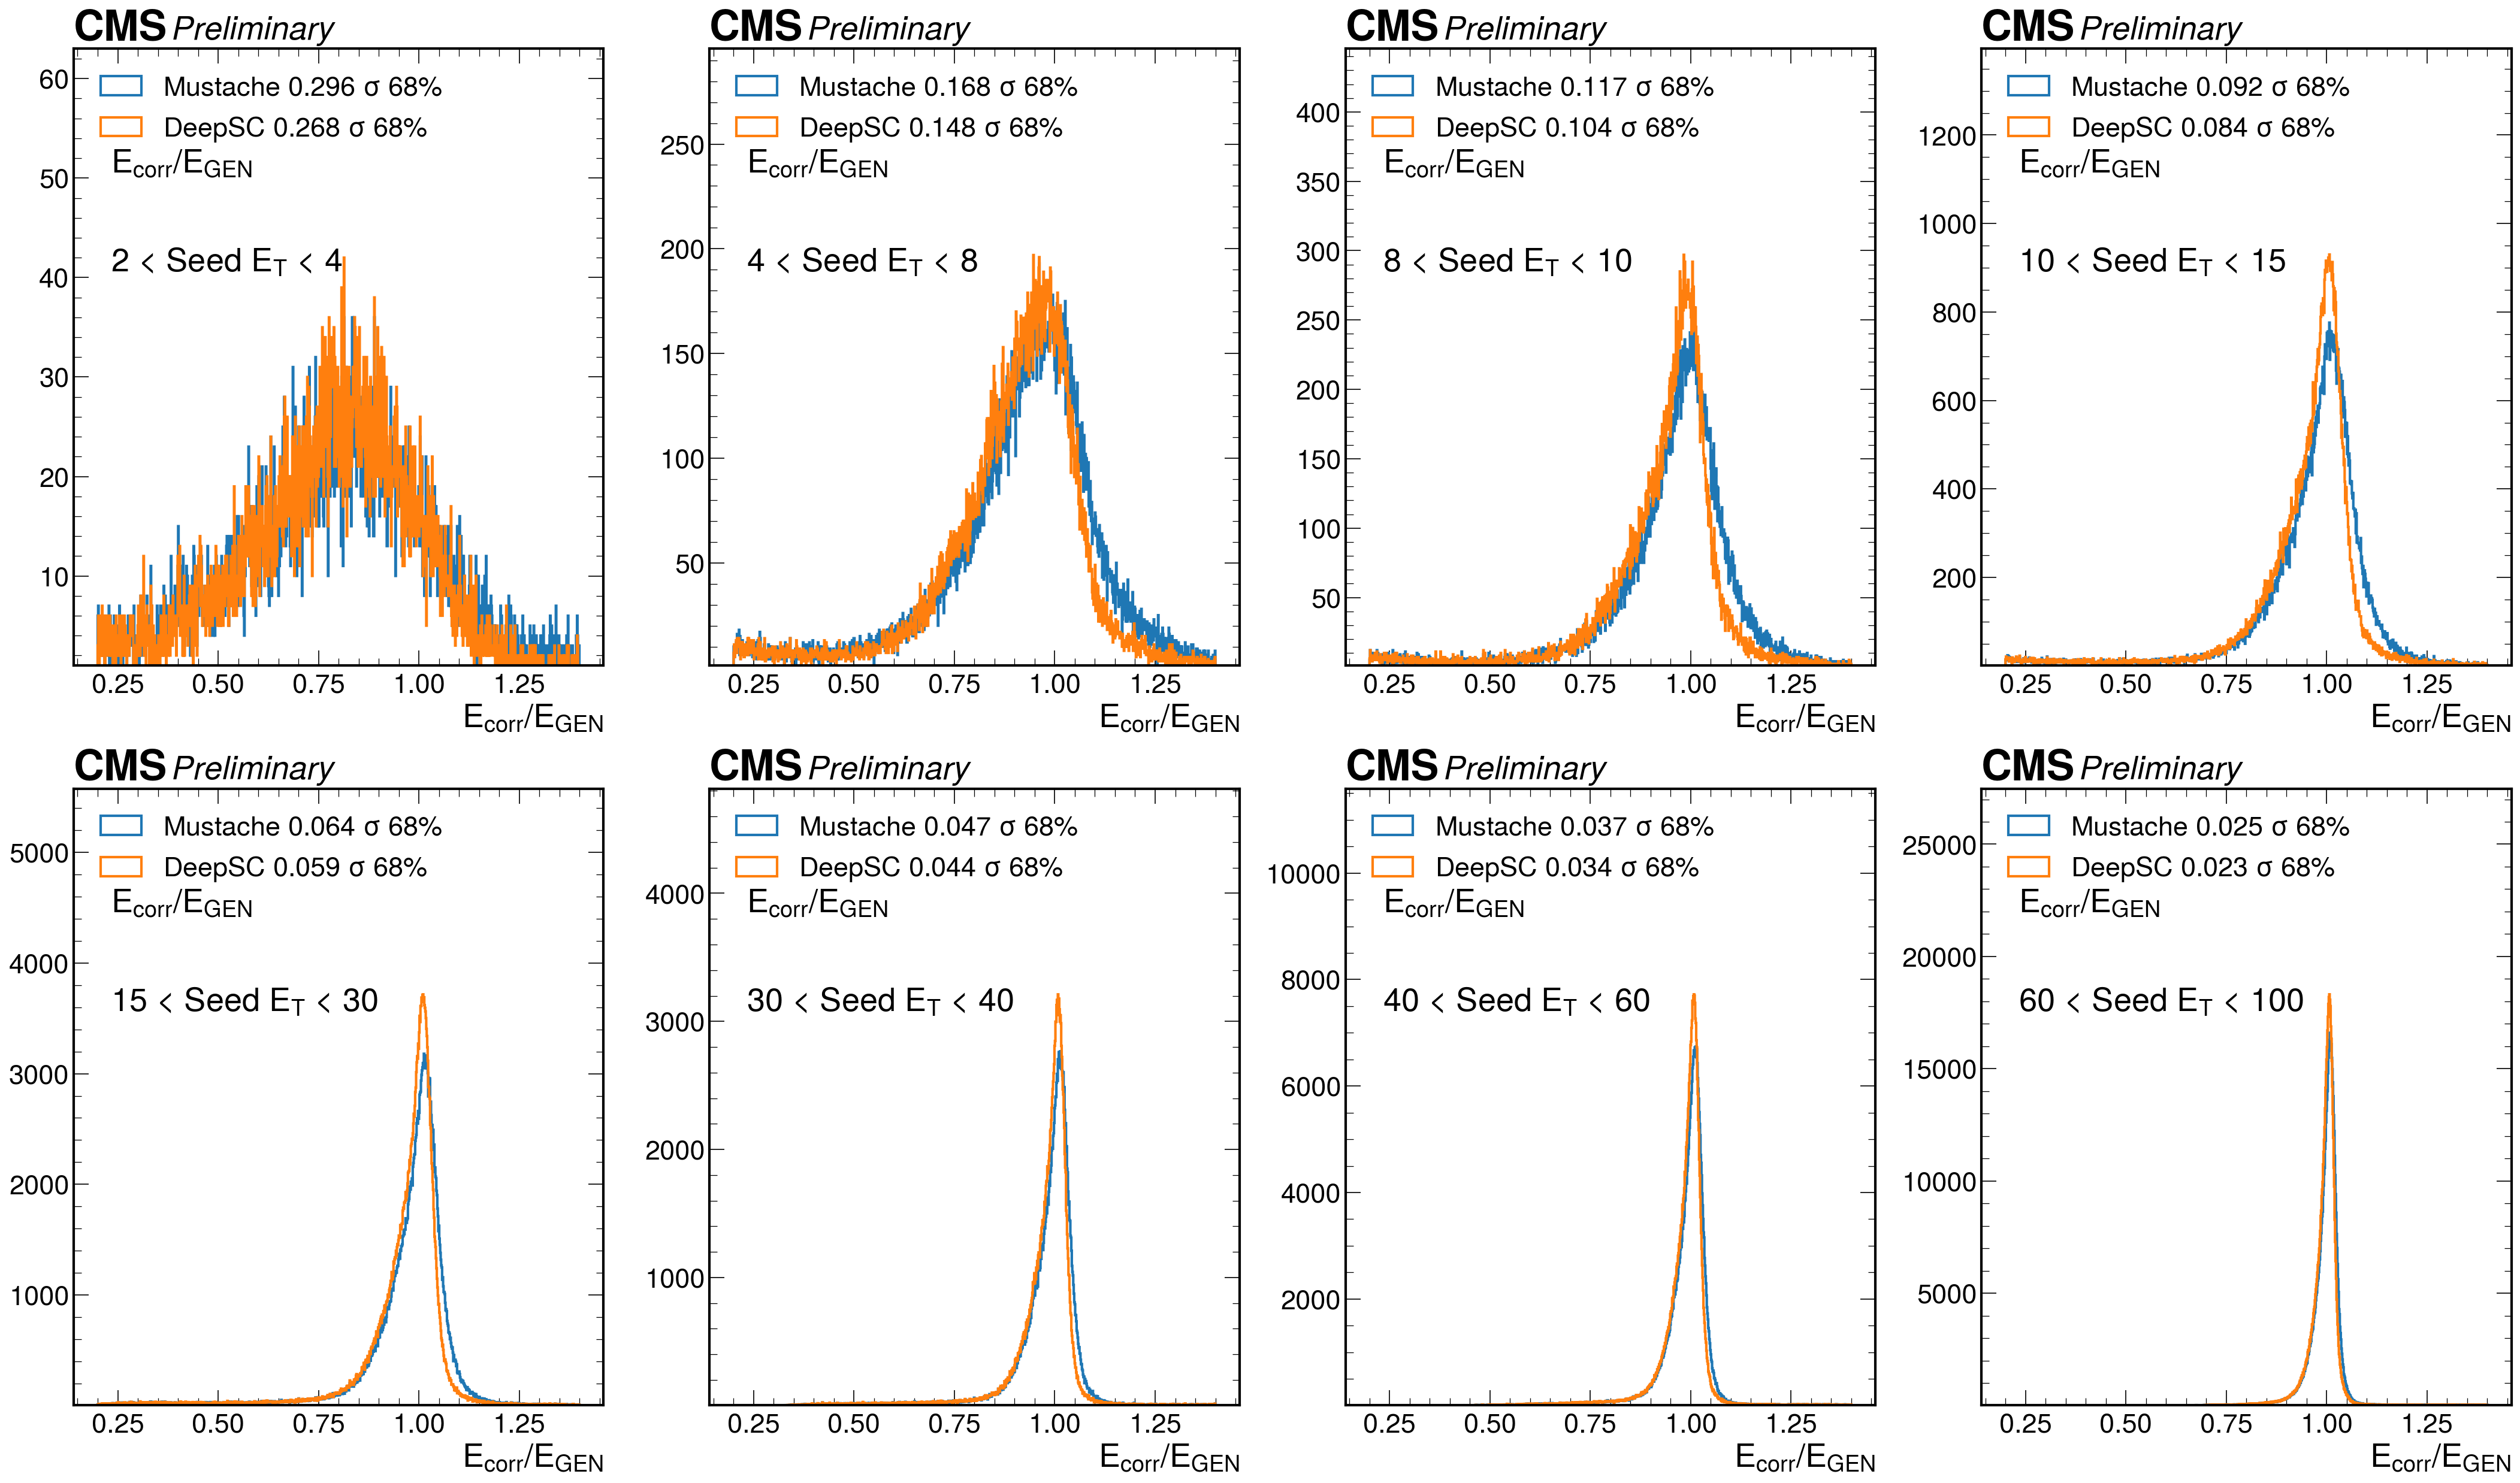

In [25]:
fig, ax = plt.subplots(2,4, figsize=(35,20),dpi=150)

xrange = (0.2, 1.4)
bins= 1000
flavour = "$E_{corr}/E_{GEN}$"
var = "Ecorr_ovEtrue_gen"

r = [2, 4, 8, 10, 15, 30 ,40, 60,100]
s = [[], []]
for i in range(len(r)-1):
    line = i //4 
    s[line].append((r[i],r[i+1]))

for j,ss in enumerate(s): 
    for i, (e1,e2) in enumerate(ss): 
        dfx_must = df_must[(abs(df_must.et_seed)>=e1) & (abs(df_must.et_seed)<e2)]
        dfx_deep = df_deep[(abs(df_deep.et_seed)>=e1) & (abs(df_deep.et_seed)<e2)]


        width, width_2 = get_sigma_eff(dfx_deep[var])
        width_must, width_2_must = get_sigma_eff(dfx_must[var])

        ax[j,i].hist(dfx_must[var],bins=bins, range=xrange,histtype='step', linewidth=2, label='Mustache {:.3f} $\sigma$ 68%'.format(width_must))
        A= ax[j,i].hist(dfx_deep[var],bins=bins, range=xrange,histtype='step', linewidth=2, label='DeepSC {:.3f} $\sigma$ 68%'.format(width))
        maxY = np.max(A[0])
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_ylim(1, 1.5 * maxY)
        ax[j,i].set_xlabel(flavour)
        ax[j,i].text(0.07,0.64,  str(e1) + ' < Seed $E_T$ < ' + str(e2), transform = ax[j,i].transAxes)  
        ax[j,i].text(0.07, 0.8, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


## Summary plot

(array([   30.,   248.,   526.,  1302.,  2229.,  2933.,  3740.,  5021.,
         7478., 12093., 15883., 17310., 18033., 18409., 18341., 19003.,
        18737., 18815., 19139., 18999., 18880., 19193., 19020., 18873.,
        19000., 19156., 19015., 19074., 19108., 19413., 19068., 19226.,
        18981., 18980., 19190., 18949., 19335., 19311., 19174., 19397.,
        19037., 19409., 19266., 19246., 19558., 19199., 19356., 19317.,
        19299., 19315., 19247., 19587., 19249., 19282., 19218., 19204.,
        19487., 19438., 19198., 19250., 19439., 19319., 19235., 19575.,
        19162., 19242., 19401., 19464., 18981., 19388., 19199., 19399.,
        19338., 19425., 19268., 19102., 19510., 19184., 19196., 19576.,
        19124., 19472., 19305., 19307., 19584., 19343., 19409., 19265.,
        19180., 19066., 19337., 19119., 19357., 19507., 19434., 19056.,
        19427., 19137., 17948., 13616.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12., 

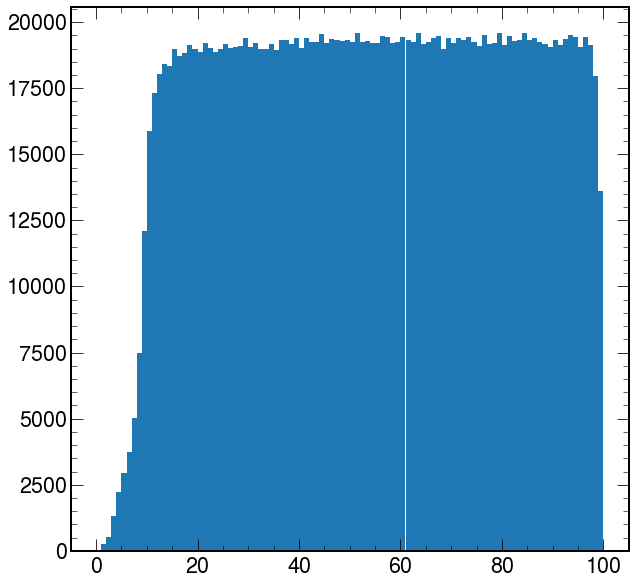

In [35]:
plt.hist(df.et_gen, bins=100, range=(0, 100))

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation'))

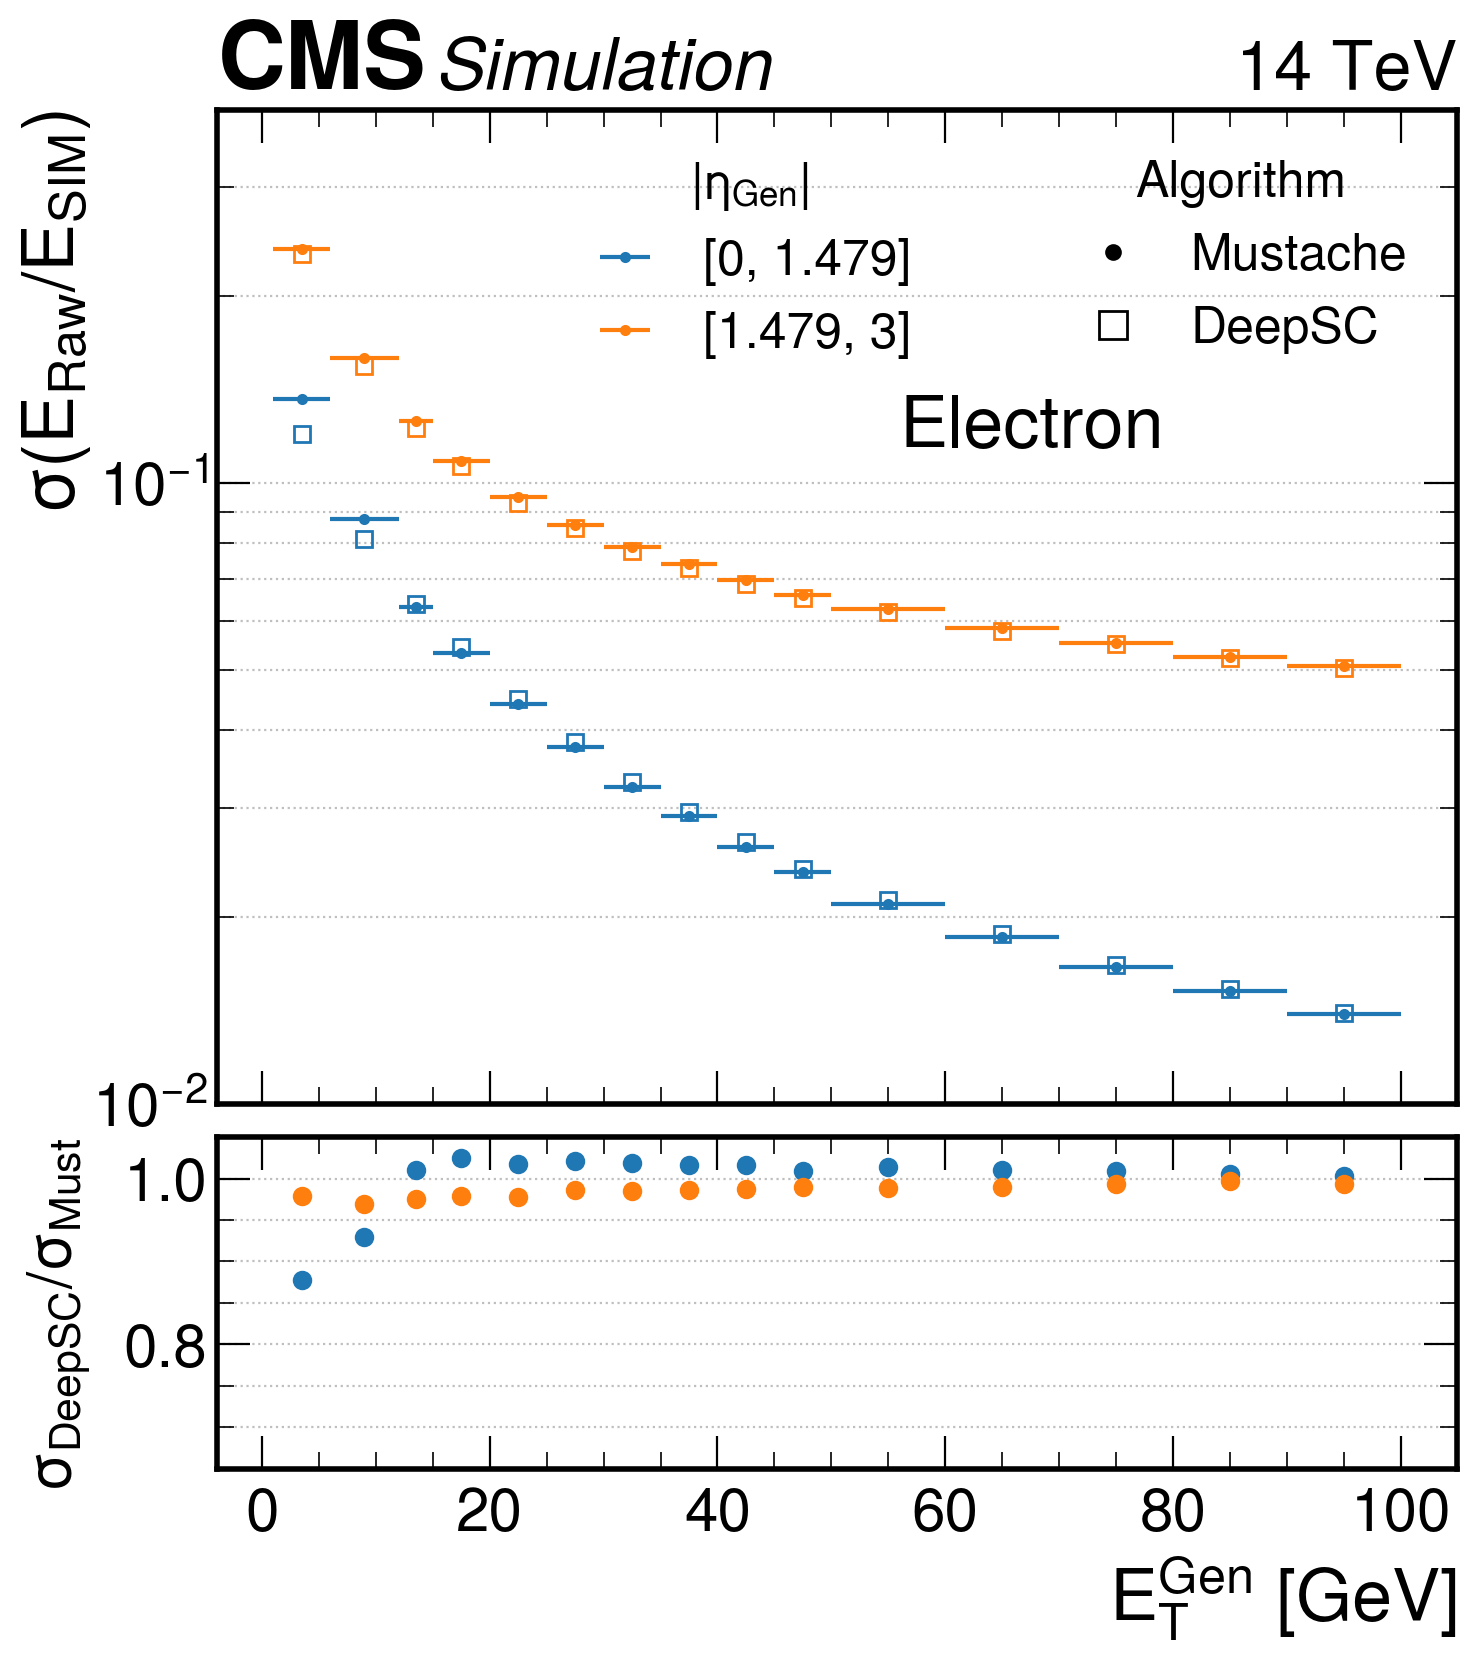

In [24]:
flavour = "Electron"
ets = [1, 6, 12, 15, 20,25 ,30,35,40, 45, 50, 60, 70, 80, 90 ,100]
etas = [0, 1.479, 3]
for df in [df_m1, df_d1]:
    df["et_bin"] = pd.cut(df.et_gen, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(abs(df.sc.seedEta), etas, labels=list(range(len(etas)-1)))


res = df_d1.groupby(["et_bin","eta_bin"]).apply(bin_analysis("Eraw_ovEtrue_sim"))
res_must = df_m1.groupby(["et_bin","eta_bin"]).apply(bin_analysis("Eraw_ovEtrue_sim"))
#     avgenraw = df.groupby(["et_bin","eta_bin"]).agg({"en_true_sim_good": "mean"})
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(ets)-1):
    errx.append((ets[i+1]- ets[i])/2)
    x.append((ets[i+1]+ ets[i])/2)

mustl = []
deepl = []



for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res_must[res_must.eta_bin == ieta].w68, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt = ".")
    mustl.append(l)

for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res[res.eta_bin == ieta].w68, xerr=errx,label="[{}, {}]".format(etas[ieta], etas[ieta+1]), 
                            marker="s", markerfacecolor='none', c=mustl[ieta].lines[0].get_color(), linestyle='none', elinewidth=0)
    deepl.append(l)


for ieta, eta in enumerate(etas[:-1]):
#         v =res_must[res_must.eta_bin == ieta].w68**2 - res[res.eta_bin == ieta].w68**2
#         var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.eta_bin == ieta].w68
    var = res[res.eta_bin == ieta].w68 / res_must[res_must.eta_bin == ieta].w68
    axs[1].errorbar(x, var, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt="o", linestyle='none', elinewidth=0 )

axs[0].set_ylabel("$\sigma (E_{Raw}/E_{SIM})$")

axs[1].set_xlabel("$E_T^{Gen}$ [GeV]")
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")
axs[0].set_ylim(1e-2, 0.4)
axs[1].set_ylim(0.65, 1.05)
axs[1].set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)
#     axs[1].legend(ncol=2, loc="upper right", fontsize=15)

axs[0].text(0.55, 0.66, flavour, transform=axs[0].transAxes)
axs[0].set_yscale("log")

l1= axs[0].legend(handles=mustl, title="$|\eta_{Gen}|$", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.6, 1), fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", fontsize=18)
axs[0].add_artist(l1)
axs[1].grid(axis="y",which="both")
axs[0].grid(axis="y", which="both")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

# fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.png".format(flavour))
# fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.pdf".format(flavour))
# fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.svg".format(flavour))

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation'))

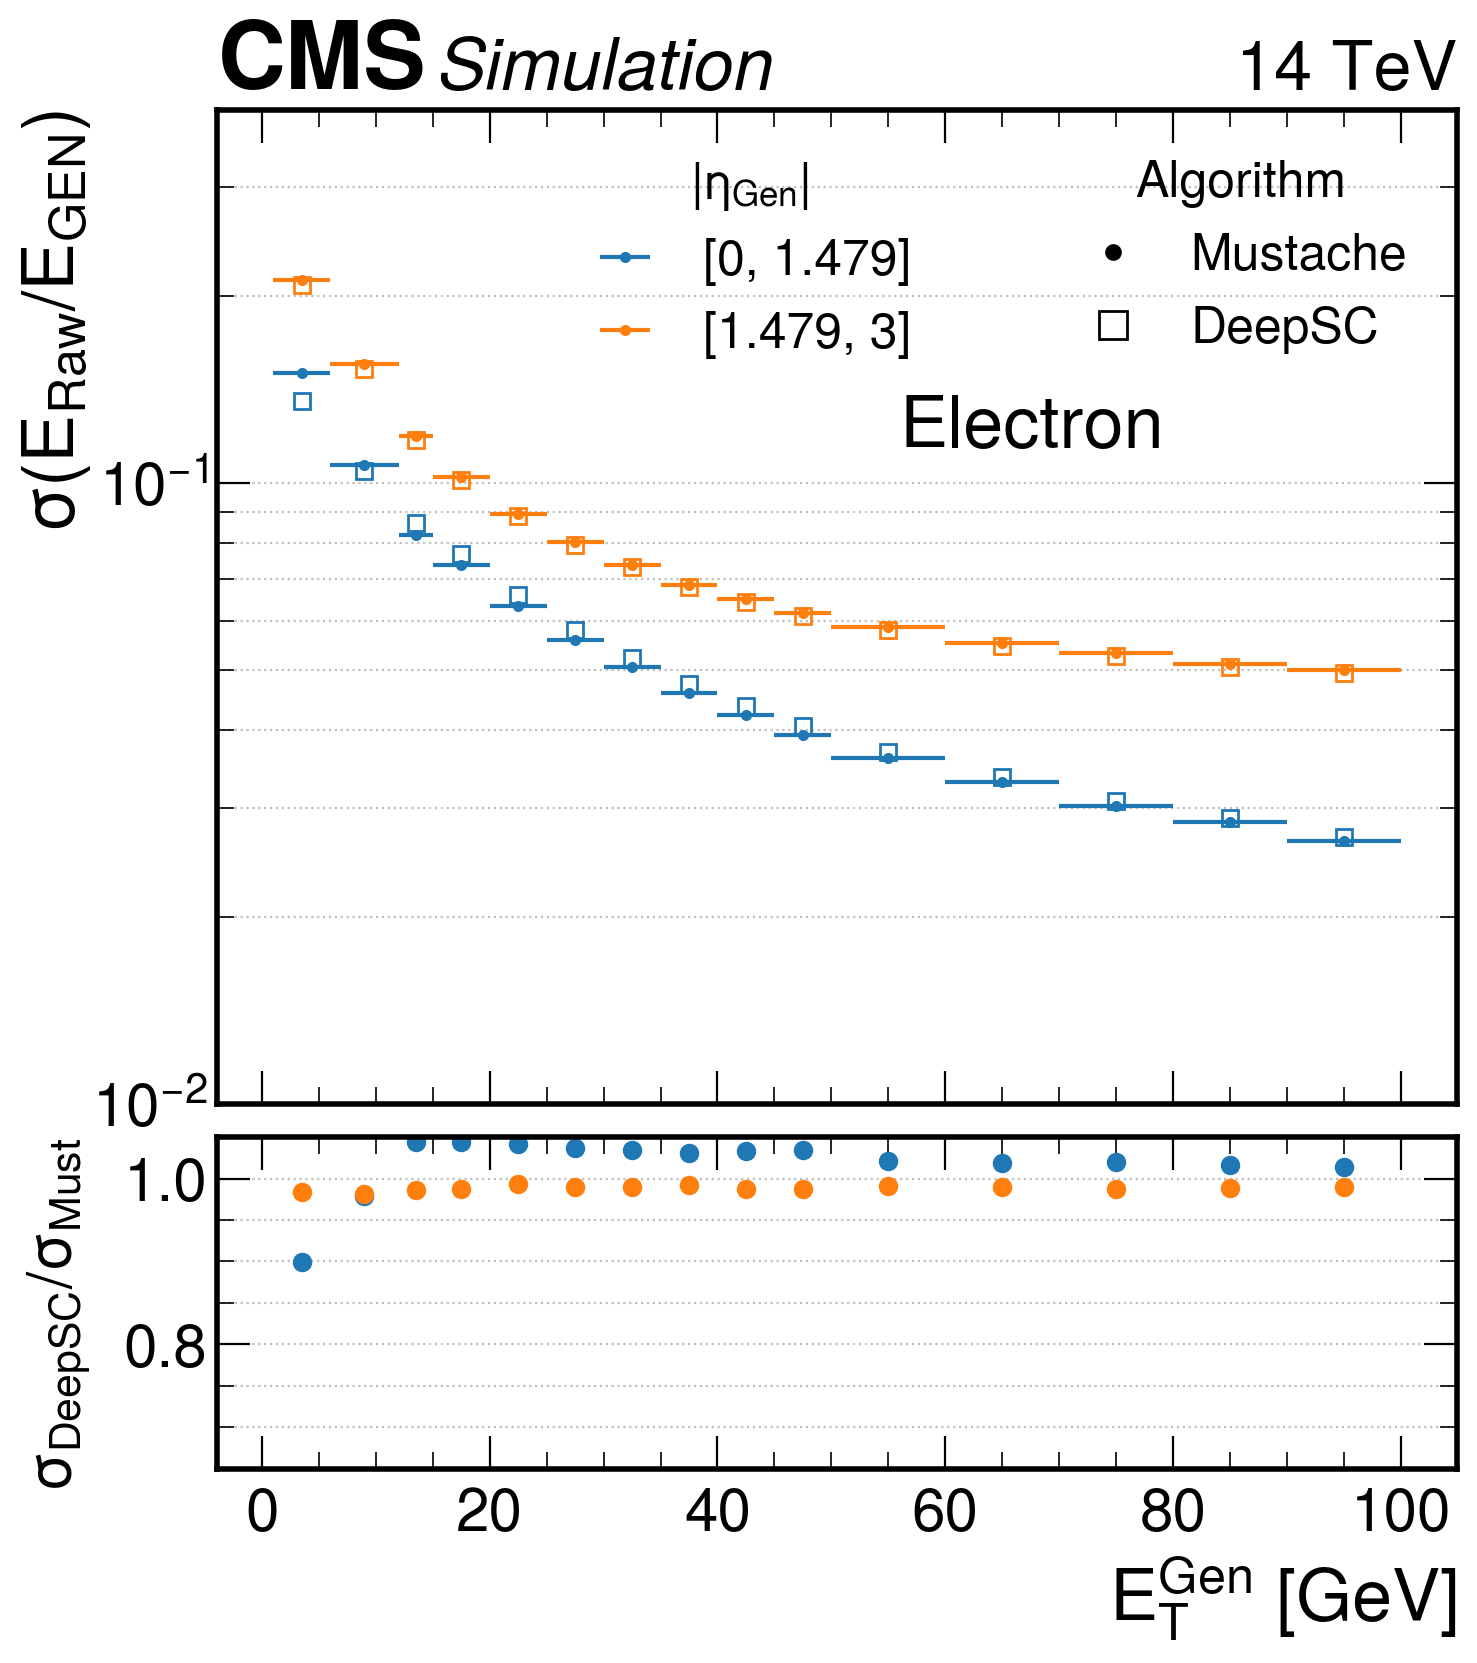

In [23]:
flavour = "Electron"
ets = [1, 6, 12, 15, 20,25 ,30,35,40, 45, 50, 60, 70, 80, 90 ,100]
etas = [0, 1.479, 3]
for df in [df_m1, df_d1]:
    df["et_bin"] = pd.cut(df.et_gen, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(abs(df.sc.seedEta), etas, labels=list(range(len(etas)-1)))


res = df_d1.groupby(["et_bin","eta_bin"]).apply(bin_analysis("Eraw_ovEtrue_gen"))
res_must = df_m1.groupby(["et_bin","eta_bin"]).apply(bin_analysis("Eraw_ovEtrue_gen"))
#     avgenraw = df.groupby(["et_bin","eta_bin"]).agg({"en_true_sim_good": "mean"})
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(ets)-1):
    errx.append((ets[i+1]- ets[i])/2)
    x.append((ets[i+1]+ ets[i])/2)

mustl = []
deepl = []



for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res_must[res_must.eta_bin == ieta].w68, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt = ".")
    mustl.append(l)

for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res[res.eta_bin == ieta].w68, xerr=errx,label="[{}, {}]".format(etas[ieta], etas[ieta+1]), 
                            marker="s", markerfacecolor='none', c=mustl[ieta].lines[0].get_color(), linestyle='none', elinewidth=0)
    deepl.append(l)


for ieta, eta in enumerate(etas[:-1]):
#         v =res_must[res_must.eta_bin == ieta].w68**2 - res[res.eta_bin == ieta].w68**2
#         var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.eta_bin == ieta].w68
    var = res[res.eta_bin == ieta].w68 / res_must[res_must.eta_bin == ieta].w68
    axs[1].errorbar(x, var, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt="o", linestyle='none', elinewidth=0 )

axs[0].set_ylabel("$\sigma (E_{Raw}/E_{GEN})$")

axs[1].set_xlabel("$E_T^{Gen}$ [GeV]")
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")
axs[0].set_ylim(1e-2, 0.4)
axs[1].set_ylim(0.65, 1.05)
axs[1].set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)
#     axs[1].legend(ncol=2, loc="upper right", fontsize=15)

axs[0].text(0.55, 0.66, flavour, transform=axs[0].transAxes)
axs[0].set_yscale("log")

l1= axs[0].legend(handles=mustl, title="$|\eta_{Gen}|$", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.6, 1), fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", fontsize=18)
axs[0].add_artist(l1)
axs[1].grid(axis="y",which="both")
axs[0].grid(axis="y", which="both")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

# fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.png".format(flavour))
# fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.pdf".format(flavour))
# fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.svg".format(flavour))

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation'))

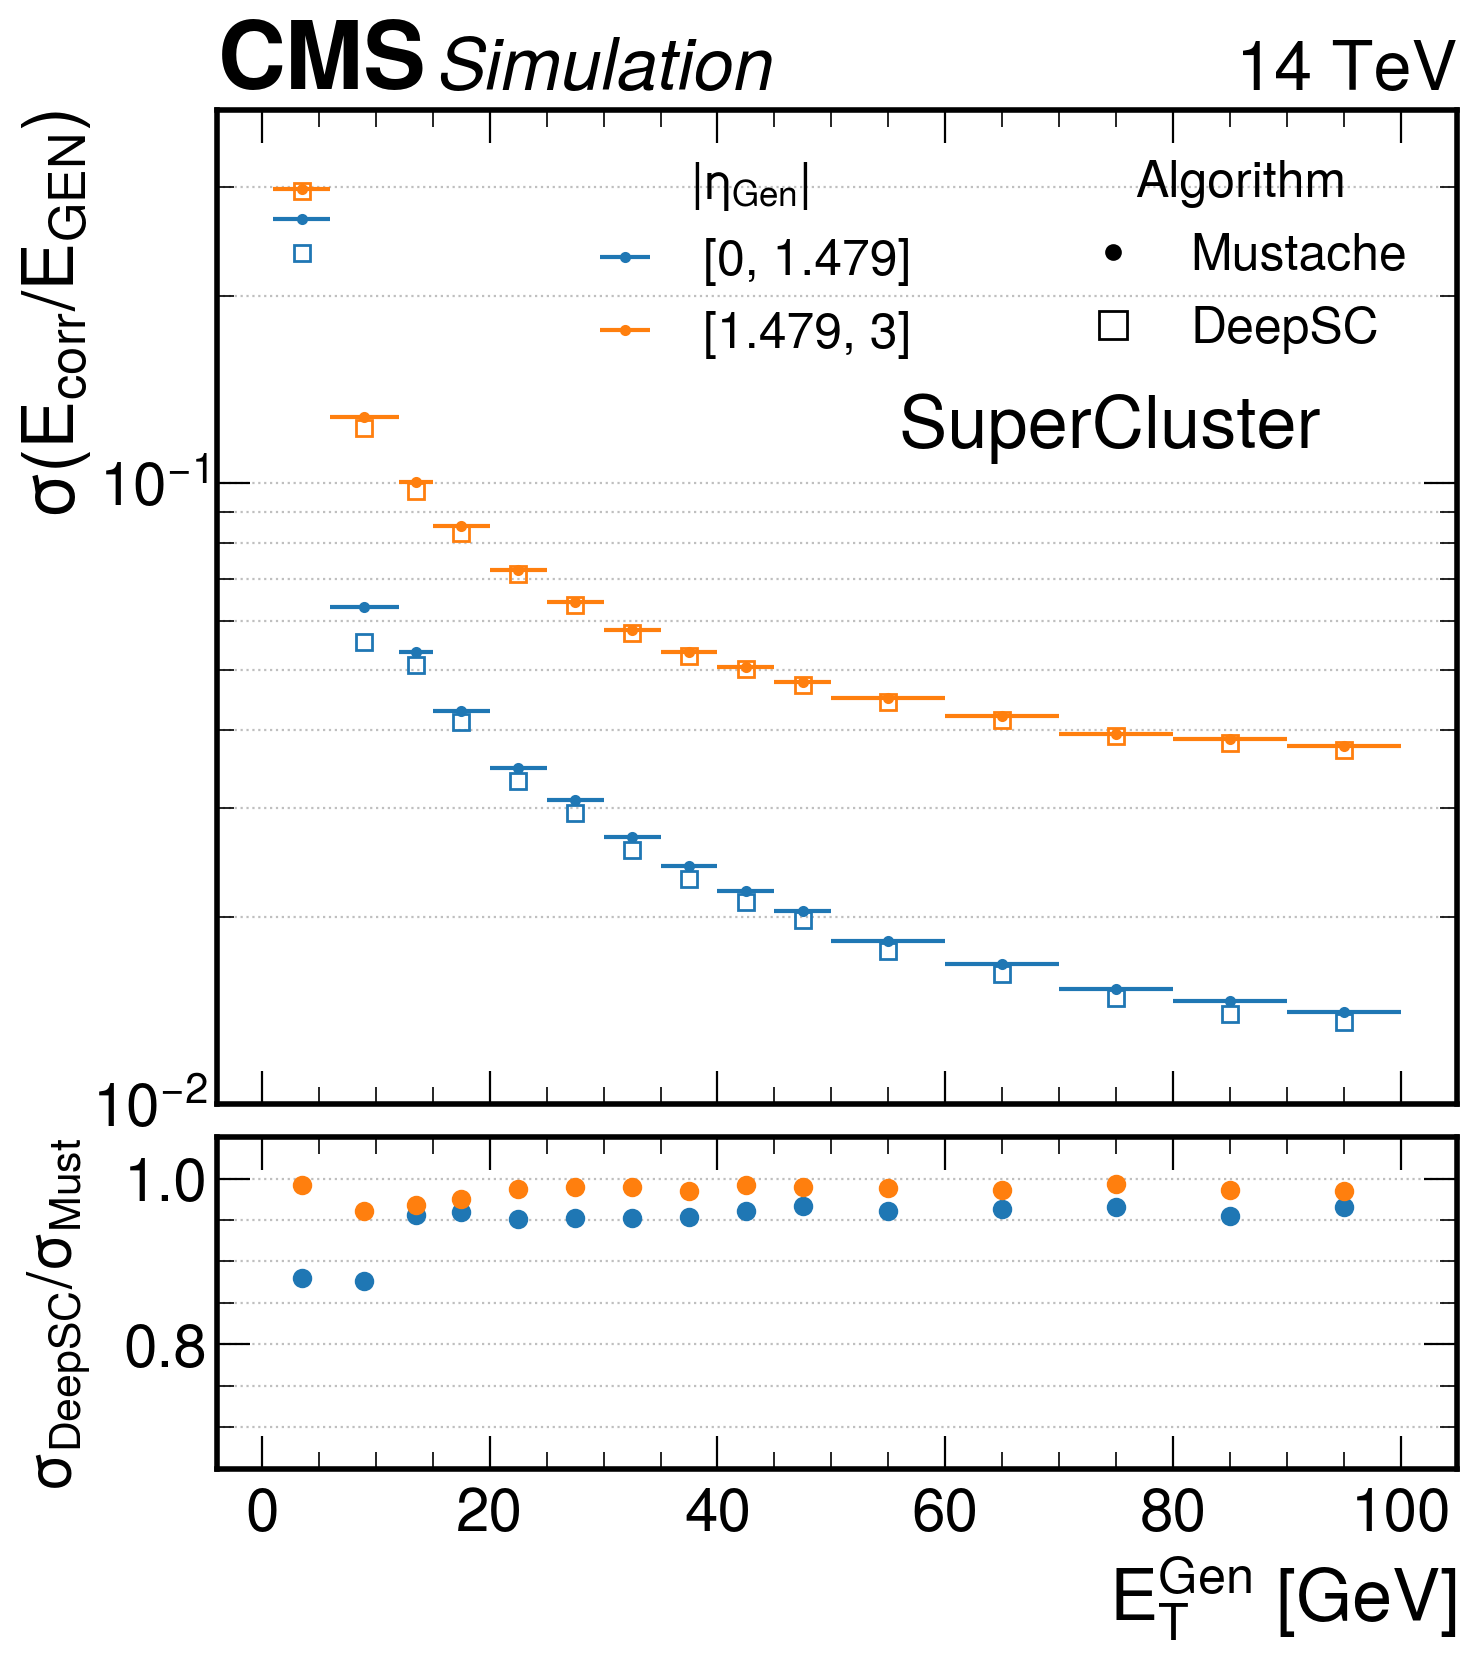

In [15]:
flavour = "SuperCluster "
ets = [1, 6, 12, 15, 20,25 ,30,35,40, 45, 50, 60, 70, 80, 90 ,100]
etas = [0, 1.479, 3]
for df in [df_m1, df_d1]:
    df["et_bin"] = pd.cut(df.et_gen, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(abs(df.sc.seedEta), etas, labels=list(range(len(etas)-1)))


res = df_d1.groupby(["et_bin","eta_bin"]).apply(bin_analysis("Ecorr_ovEtrue_gen"))
res_must = df_m1.groupby(["et_bin","eta_bin"]).apply(bin_analysis("Ecorr_ovEtrue_gen"))
#     avgenraw = df.groupby(["et_bin","eta_bin"]).agg({"en_true_sim_good": "mean"})
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(ets)-1):
    errx.append((ets[i+1]- ets[i])/2)
    x.append((ets[i+1]+ ets[i])/2)

mustl = []
deepl = []



for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res_must[res_must.eta_bin == ieta].w68, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt = ".")
    mustl.append(l)

for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res[res.eta_bin == ieta].w68, xerr=errx,label="[{}, {}]".format(etas[ieta], etas[ieta+1]), 
                            marker="s", markerfacecolor='none', c=mustl[ieta].lines[0].get_color(), linestyle='none', elinewidth=0)
    deepl.append(l)


for ieta, eta in enumerate(etas[:-1]):
#         v =res_must[res_must.eta_bin == ieta].w68**2 - res[res.eta_bin == ieta].w68**2
#         var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.eta_bin == ieta].w68
    var = res[res.eta_bin == ieta].w68 / res_must[res_must.eta_bin == ieta].w68
    axs[1].errorbar(x, var, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt="o", linestyle='none', elinewidth=0 )

axs[0].set_ylabel("$\sigma (E_{corr}/E_{GEN})$")

axs[1].set_xlabel("$E_T^{Gen}$ [GeV]")
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")
axs[0].set_ylim(1e-2, 0.4)
axs[1].set_ylim(0.65, 1.05)
axs[1].set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)
#     axs[1].legend(ncol=2, loc="upper right", fontsize=15)

axs[0].text(0.55, 0.66, flavour, transform=axs[0].transAxes)
axs[0].set_yscale("log")

l1= axs[0].legend(handles=mustl, title="$|\eta_{Gen}|$", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.6, 1), fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", fontsize=18)
axs[0].add_artist(l1)
axs[1].grid(axis="y",which="both")
axs[0].grid(axis="y", which="both")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

# fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.png".format(flavour))
# fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.pdf".format(flavour))
# fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.svg".format(flavour))

## Resolution by Eta

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation'))

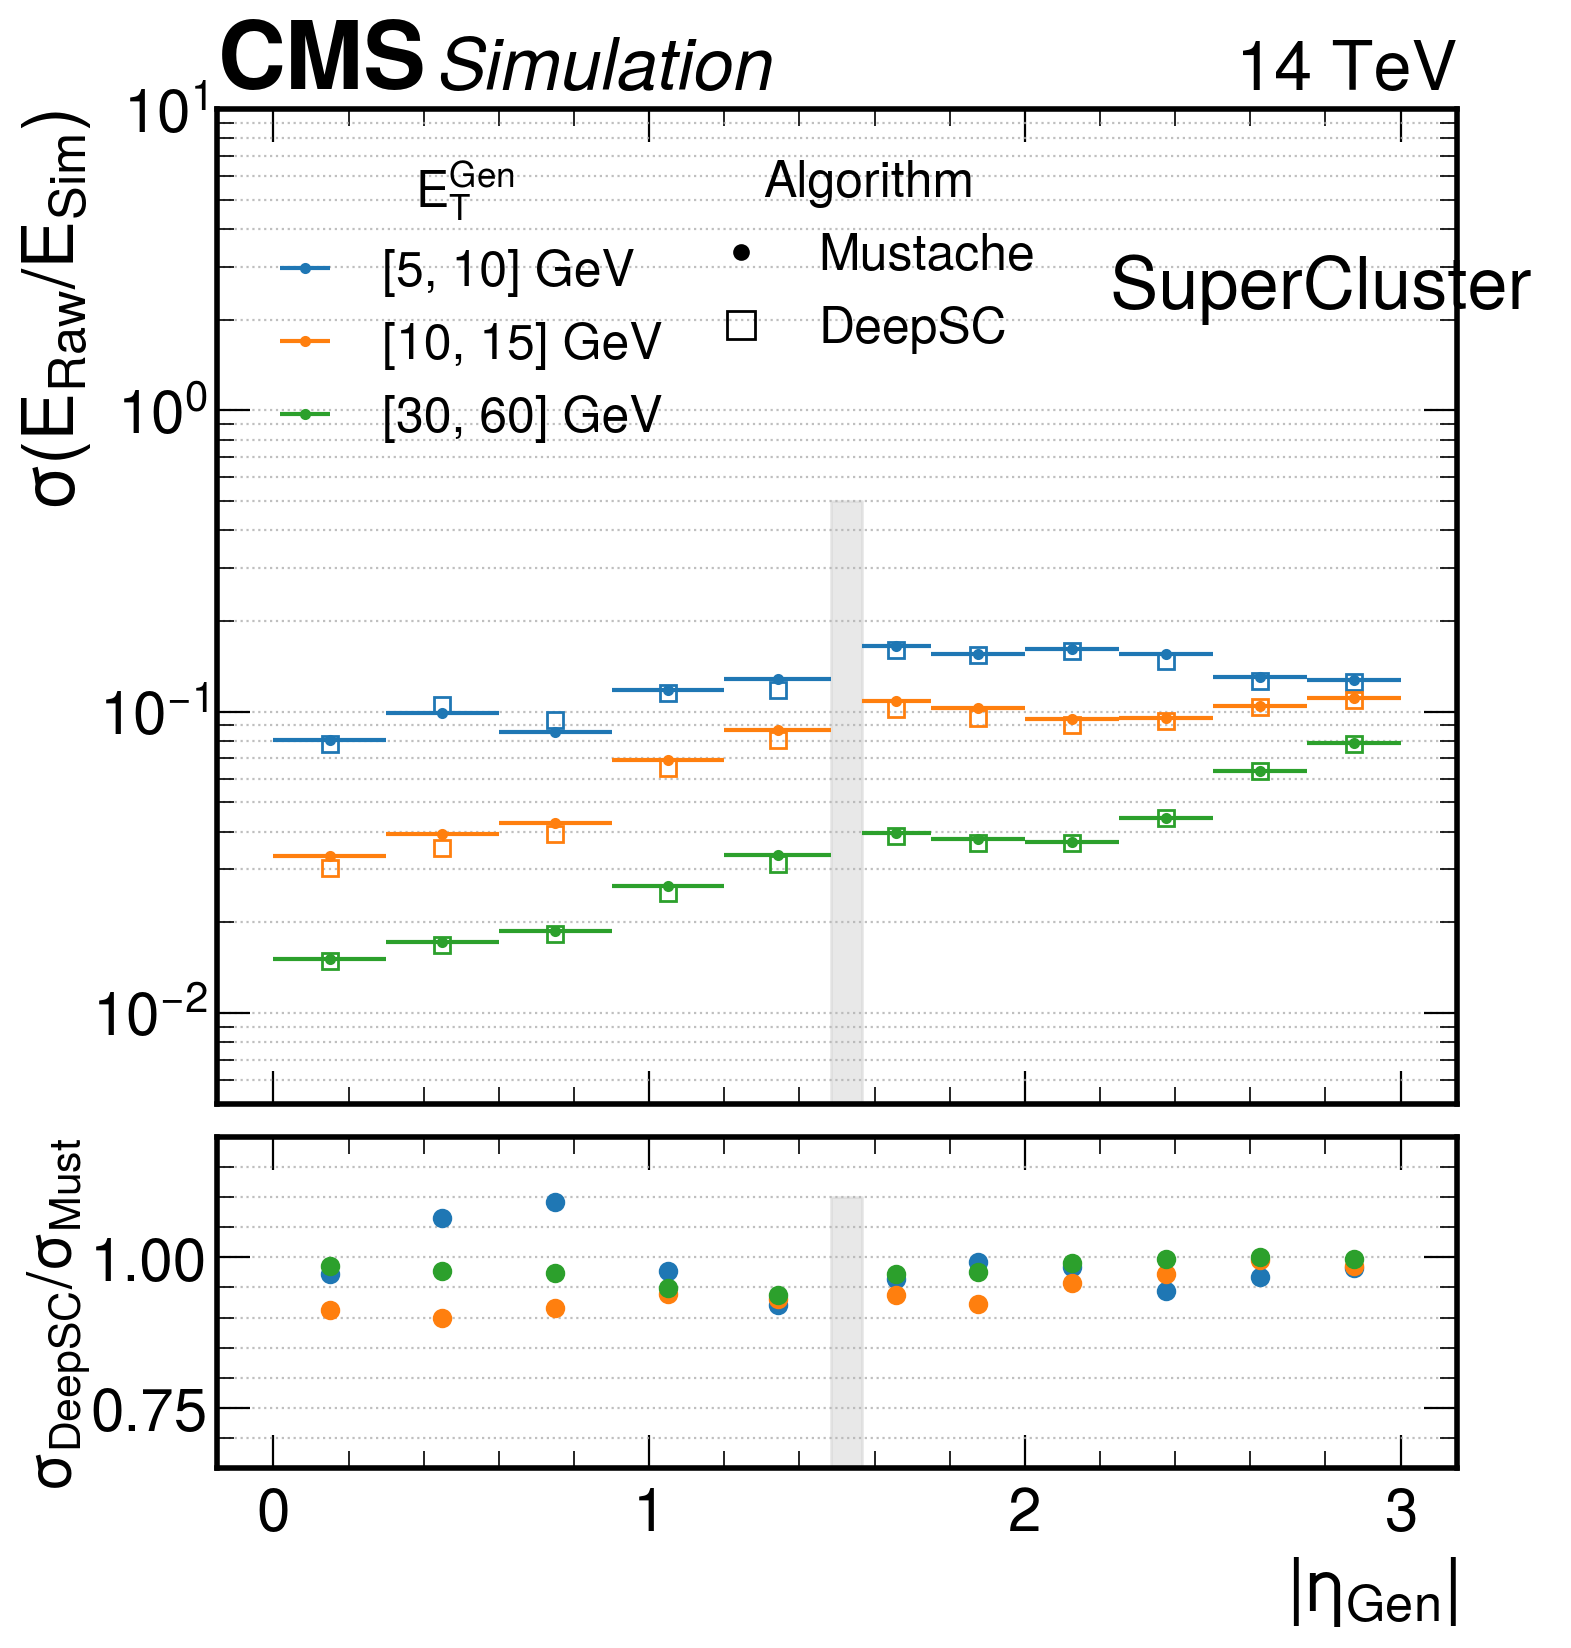

In [17]:
ets = [5,10, 15, 30,60]
iplot = [0, 1, 3 ]
etas = [0, 0.3,0.6,0.9,1.2, 1.485, 1.566, 1.75, 2.,2.25,2.5,2.75,3]
exclude_bin = 5

for df in [df_m1, df_d1]:
    df["et_bin"] = pd.cut(df.et_gen, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(abs(df.sim.eta), etas, labels=list(range(len(etas)-1)))


res = df_d1.groupby(["et_bin","eta_bin"]).apply(bin_analysis("Ecorr_ovEtrue_gen"))
res_must = df_m1.groupby(["et_bin","eta_bin"]).apply(bin_analysis("Ecorr_ovEtrue_gen"))
#     avgenraw = df.groupby(["et_bin","eta_bin"]).agg({"en_true_sim_good": "mean"})
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(etas)-1):
    errx.append((etas[i+1]- etas[i])/2)
    x.append((etas[i+1]+ etas[i])/2)

mustl = []
deepl = []

res.loc[res.eta_bin == exclude_bin, ["w68"]] = 0
res_must.loc[res_must.eta_bin == exclude_bin, ["w68"]] = 0

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, res_must[res_must.et_bin == iet].w68, xerr=errx, label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), fmt = ".")
    mustl.append(l)

i = 0
for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, res[res.et_bin == iet].w68,  xerr=errx ,label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), 
                            c=mustl[i].lines[0].get_color(), marker="s", markerfacecolor='none', linestyle='none',elinewidth=0)
    i+=1
    deepl.append(l)

axs[0].fill_between([1.485, 1.566], [5e-3,5e-3],[0.5,0.5], color="lightgray", alpha=0.5)

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    #v =res_must[res_must.et_bin == iet].w68**2 - res[res.et_bin == iet].w68**2
    #var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.et_bin == iet].w68
    var = res[res.et_bin==iet].w68 / res_must[res_must.et_bin==iet].w68
    axs[1].errorbar(x, var,xerr=errx, label="$E_T^{Gen} $" + " [{}, {}] GeV".format(ets[iet], ets[iet+1]),  fmt="o", linestyle='none', elinewidth=0)

axs[0].set_ylabel("$\sigma (E_{Raw}/E_{Sim})$")

l1= axs[0].legend(handles=mustl, title="$E_T^{Gen}$", title_fontsize=18, loc="upper left", fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.7, 1), fontsize=18)
axs[0].add_artist(l1)

axs[1].set_xlabel("$|\eta_{Gen}|$")
axs[0].set_ylim(5e-3,1e1)
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")

axs[1].set_ylim(0.65, 1.2)
axs[1].set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)

axs[1].fill_between([1.485, 1.566], [-0.1,-0.1],[1.1,1.1], color="lightgray", alpha=0.5)

#     axs[1].legend(ncol=3,prop={'size': 13}, loc="lower left" )

axs[0].text(0.72, 0.8, flavour, transform=axs[0].transAxes)

axs[0].set_yscale("log")
axs[0].grid(which="both",axis="y")
axs[1].grid(which="both",axis="y")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

# fig.savefig(output_folder + "/resolution_byeta_{}_ratio.png".format(flavour))
# fig.savefig(output_folder + "/resolution_byeta_{}_ratio.pdf".format(flavour))
# fig.savefig(output_folder + "/resolution_byeta_{}_ratio.svg".format(flavour))

## Resolution by PU

In [29]:
df_deep.columns

MultiIndex([(               'sc',              'rawEnergy'),
            (               'sc',            'rawESEnergy'),
            (               'sc',               'etaWidth'),
            (               'sc',               'phiWidth'),
            (               'sc',         'seedClusEnergy'),
            (               'sc',       'numberOfClusters'),
            (               'sc',    'numberOfSubClusters'),
            (               'sc',           'clusterMaxDR'),
            (               'sc',       'clusterMaxDRDPhi'),
            (               'sc',       'clusterMaxDRDEta'),
            (               'sc',  'clusterMaxDRRawEnergy'),
            (               'sc',             'corrEnergy'),
            (               'sc',                  'scEta'),
            (               'sc',                  'scPhi'),
            (               'sc',                'seedEta'),
            (               'sc',                'seedPhi'),
            (           

In [31]:

nvtx = [20,45,50,55,60,70,80,90,120]
ets = [1,5,15,30,60]
iplot =[0,1,3]
for df in [df_must, df_deep]:
    df["nvtx_bin"] = pd.cut(np.flatten(df.nrPUInt.values), nvtx, labels=list(range(len(nvtx)-1)))
    df["et_bin"] = pd.cut(df.et_gen, ets, labels=list(range(len(ets)-1)))

res = df_deep.groupby(["nvtx_bin","et_bin"]).apply(bin_analysis("Ecorr_ovEtrue_gen"))
res_must = df_must.groupby(["nvtx_bin","et_bin"]).apply(bin_analysis("Ecorr_ovEtrue_gen"))
#     avgenraw = df.groupby(["nvtx_bin","et_bin"]).agg({"en_true_sim_good": "mean"})
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
ax, ar = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(nvtx)-1):
    errx.append((nvtx[i+1]- nvtx[i])/2)
    x.append((nvtx[i+1]+ nvtx[i])/2)

mustl = []
deepl = []

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = ax.errorbar(x, res_must[res_must.et_bin == iet].w68, xerr=errx, label=" [{}, {}] GeV".format(ets[iet], ets[iet+1]), fmt = ".")
    mustl.append(l)

i =0
for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = ax.errorbar(x, res[res.et_bin == iet].w68 , xerr=errx,
                label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), marker="s", markerfacecolor='none', 
                c=mustl[i].lines[0].get_color(), linestyle='none', elinewidth=0)
    i+=1
    deepl.append(l)

ax.set_ylim(1e-2, 6)
ax.set_ylabel("$\sigma (E_{Raw}/E_{Sim})$")
ax.grid(axis="y", which="both")
ax.get_yaxis().set_label_coords(-0.1,1)
ax.set_yscale("log")

#     ax.legend(ncol=2, fontsize='x-small', loc="upper left", title="Seed $E_T$", title_fontsize="small")
l1= ax.legend(handles=mustl, title="$E_T^{Gen}$", title_fontsize=18, loc="upper left", fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
ax.legend(handles=[ml,dl], title="Algo", title_fontsize=18, loc="upper right",bbox_to_anchor=(0.7, 1), fontsize=18)
ax.add_artist(l1)

ax.text(0.72, 0.8, flavour, transform=ax.transAxes)
hep.cms.label( loc=0, ax=ax, rlabel="14 TeV")

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    #v =res_must[res_must.et_bin == iet].w68**2 - res[res.et_bin == iet].w68**2
    #var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.et_bin == iet].w68
    var = res[res.et_bin == iet].w68 / res_must[res_must.et_bin==iet].w68
    ar.errorbar(x, var, xerr=errx, label="$E_T^{Gen}$" + " [{}, {}] GeV".format(ets[iet], ets[iet+1]),fmt="o", linestyle='none', elinewidth=0 )

ar.set_ylim(0.7, 1.05)
ar.set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)

ar.get_yaxis().set_label_coords(-0.1,1)

#     ar.legend(ncol=3,prop={'size': 13}, loc="lower left" )

ar.set_xlabel("$PU_{sim}$")
ar.grid(axis="y", which="both")

# fig.savefig(output_folder + "/resolution_byPU_{}_ratio.png".format(flavour))
# fig.savefig(output_folder + "/resolution_byPU_{}_ratio.pdf".format(flavour))
# fig.savefig(output_folder + "/resolution_byPU_{}_ratio.svg".format(flavour))


AttributeError: module 'numpy' has no attribute 'flatten'

### Quantiles analysis